Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="darkgrid") # set the background for the graphs
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Age analysis

In [5]:
print('Oldest patient was', data.age.max(), 'years old.')
print('Youngest patient was', data.age.min(), 'years old.')
print('Average age of patients was', data.age.mean())

Oldest patient was 64 years old.
Youngest patient was 18 years old.
Average age of patients was 39.20702541106129


In [6]:
df = data[['sex', 'age']].groupby(['sex']).mean()
def plts(data, x, y, title): 
    fig, axs = plt.subplots(figsize=(18,8))    
    sns.countplot(x=x, hue=y, data=data)
    plt.show()

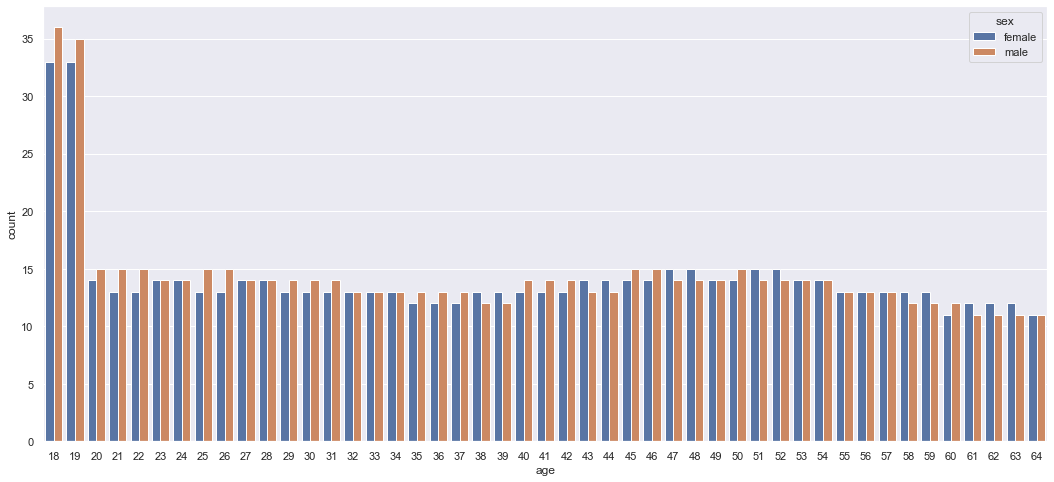

In [7]:
plts(data,'age', 'sex','age vs sex' )

<AxesSubplot:xlabel='age', ylabel='Count'>

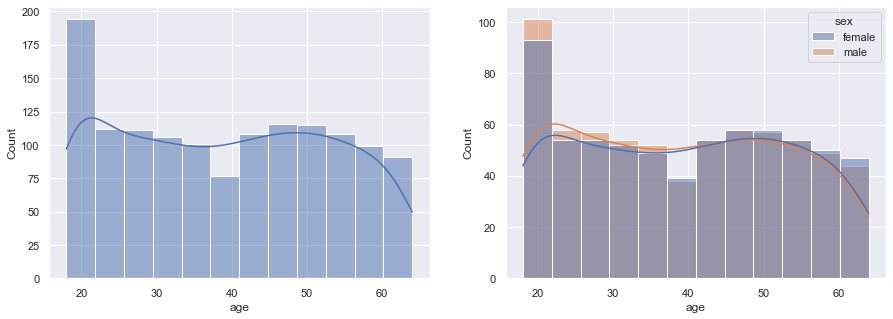

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=data, x='age', kde=True, ax=ax[0])
sns.histplot(data=data, x='age',hue='sex', kde=True, ax = ax[1])

In [9]:
pd.crosstab(data.age, data.smoker, margins=True).style.background_gradient(cmap='viridis')

smoker,no,yes,All
age,,,
18,57,12,69
19,50,18,68
20,20,9,29
21,26,2,28
22,22,6,28
23,21,7,28
24,22,6,28
25,23,5,28
26,25,3,28


# Main Location of patients

In [10]:
pd.crosstab(data.region, data.sex)

sex,female,male
region,,
northeast,161,163
northwest,164,161
southeast,175,189
southwest,162,163


In [11]:
pd.crosstab(data.region, data.smoker)

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [12]:
pd.crosstab(data.region, data.children)

children,0,1,2,3,4,5
region,,,,,,
northeast,147,77,51,39,7,3
northwest,132,74,66,46,6,1
southeast,157,95,66,35,5,6
southwest,138,78,57,37,7,8


In [13]:
region_count = data['region'].value_counts()
print(region_count)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


Text(0.5, 1.0, 'Location analysis')

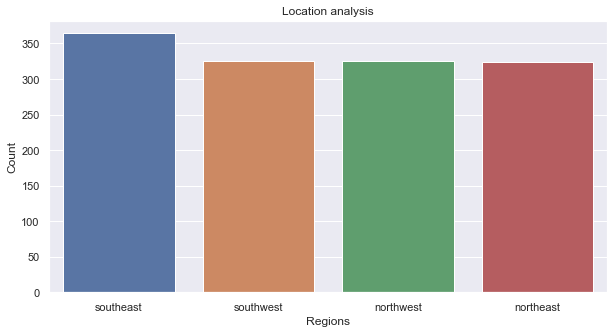

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='region', data=data, order = region_count.index)
plt.xlabel('Regions')
plt.ylabel('Count')
plt.title('Location analysis')

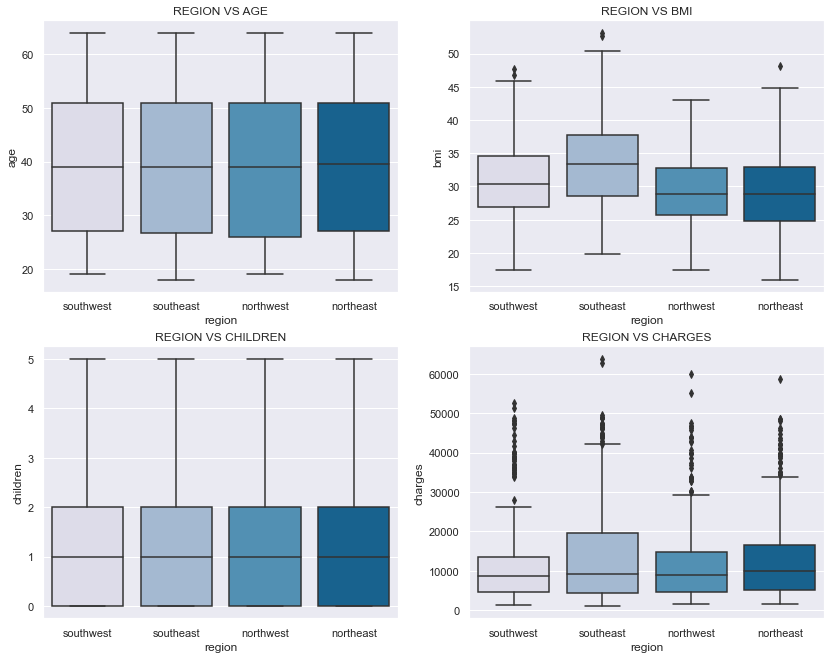

In [15]:
fig, axes = plt.subplots(2,2,figsize=(14, 11))
list_col=  data.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes[row,col]
    sns.boxplot(y=data[list_col[i]],x=data['region'],ax=ax,palette="PuBu",orient='v').set(title='REGION VS '+ list_col[i].upper()  )

## Smokers vs Non-smokers

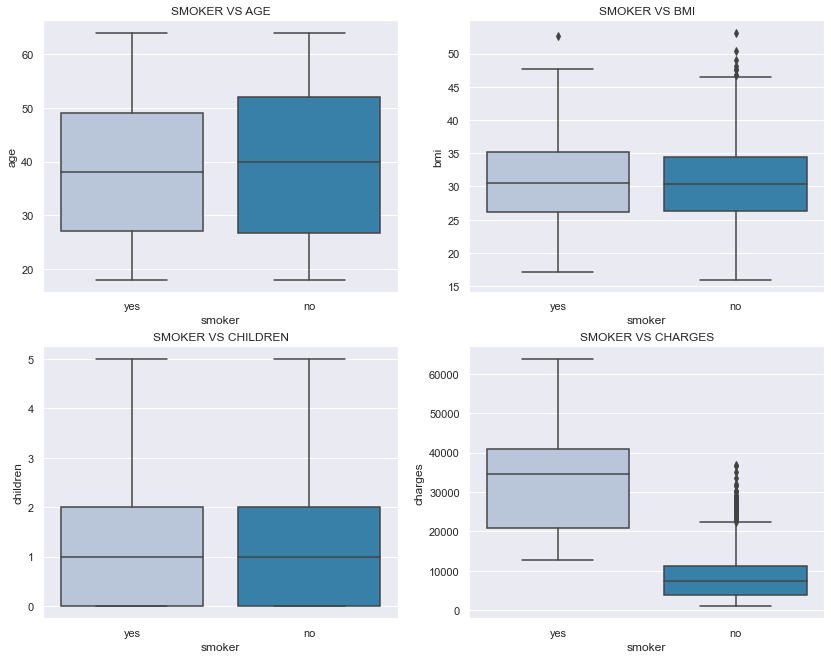

In [16]:
fig, axes = plt.subplots(2,2,figsize=(14, 11))
list_col=  data.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes[row,col]
    sns.boxplot(y=data[list_col[i]],x=data['smoker'],ax=ax,palette="PuBu",orient='v').set(title='SMOKER VS '+ list_col[i].upper()  )

In [17]:
smoker_all = data.groupby('smoker').mean()
smoker_all

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


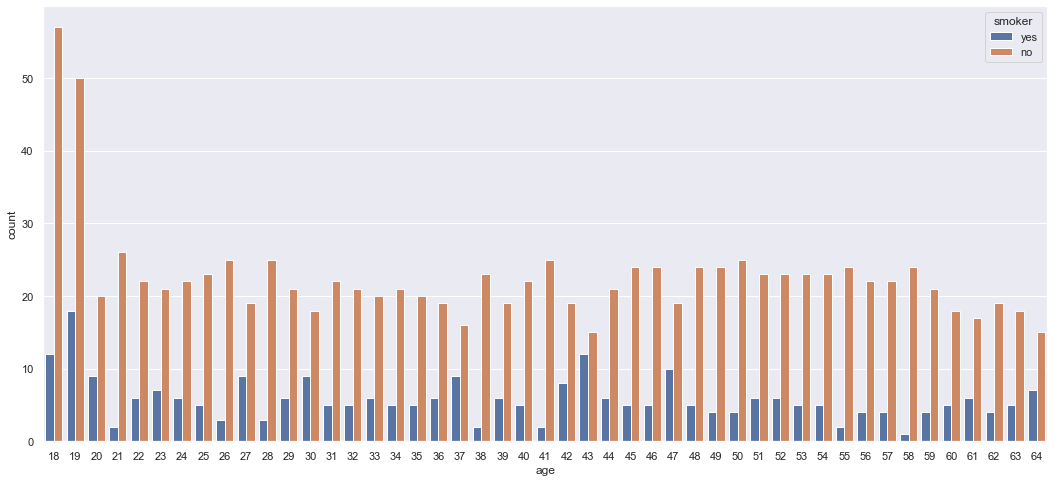

In [18]:
plts(data,'age', 'smoker','age vs smoker' )

<Figure size 720x1440 with 0 Axes>

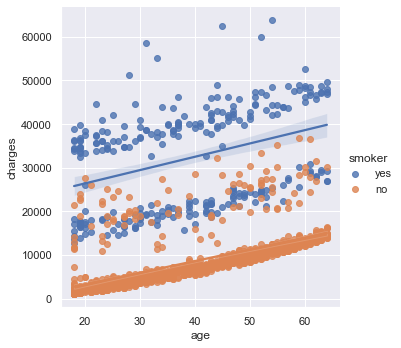

In [19]:
plt.figure(figsize=(10,20))
sns.lmplot(x='age', y='charges',hue='smoker', data=data )
plt.show()

In [20]:
print(data['charges'].max())

63770.42801


In [21]:
data[data['charges'] == data['charges'].max()]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


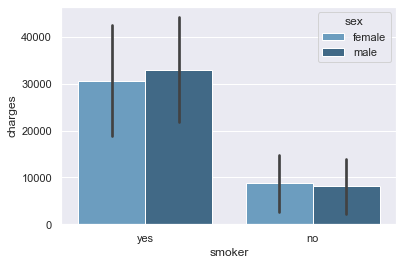

In [22]:
sns.barplot(data=data, y='charges', x='smoker', hue='sex',  ci = 'sd', palette='Blues_d')
plt.show()

In [23]:
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

[Text(0.5, 1.0, 'Smoker vs Sex')]

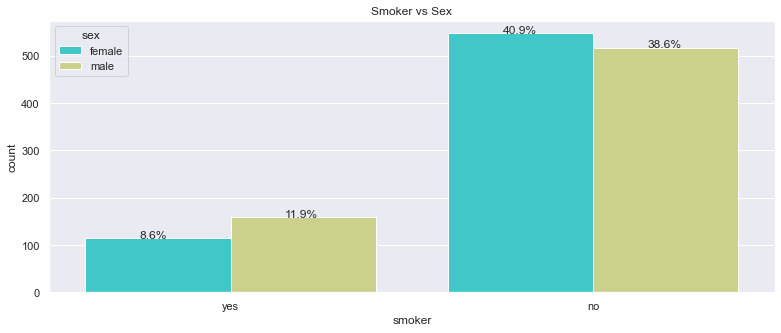

In [24]:
#smoker vs Sex
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoker',hue='sex',data=data,palette='rainbow')
bar_perc(ax,data['sex'])
ax.set(title="Smoker vs Sex")

## Analysis based on sex

In [25]:
gender = data.groupby('sex').mean()
gender

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


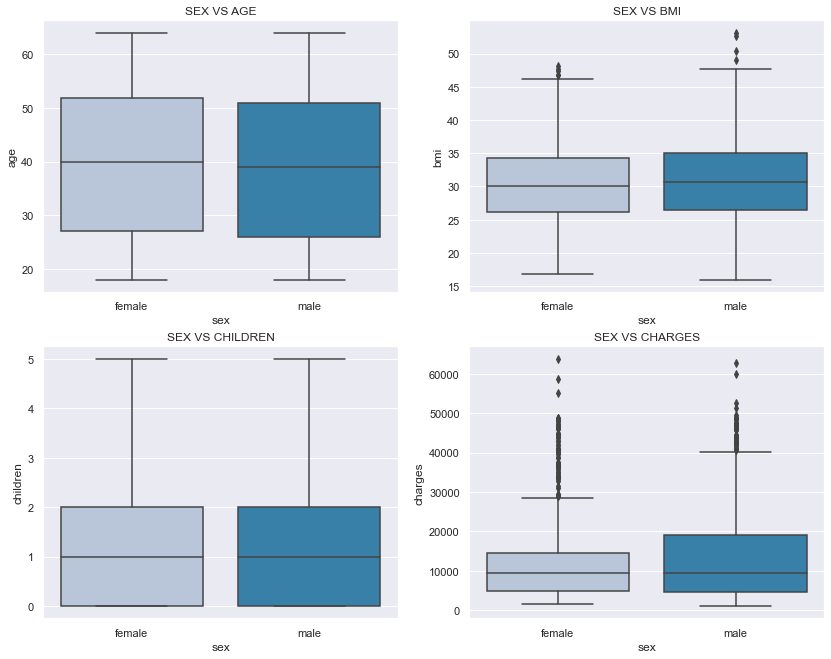

In [26]:
fig, axes = plt.subplots(2,2,figsize=(14, 11))
list_col=  data.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    row=i//2
    col=i%2
    ax=axes[row,col]
    sns.boxplot(y=data[list_col[i]],x=data['sex'],ax=ax,palette="PuBu",orient='v').set(title='SEX VS '+ list_col[i].upper()  )

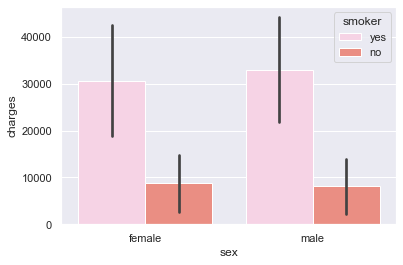

In [27]:
sns.barplot(data=data, y='charges', x='sex', hue='smoker',  ci = 'sd', palette='Set3_r')
plt.show()

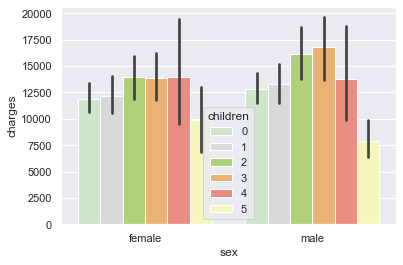

In [28]:
sns.barplot(data=data, y='charges', x='sex', hue='children', palette='Set3_r')
plt.show()

In [29]:
pd.crosstab(data.sex, data.children)

children,0,1,2,3,4,5
sex,,,,,,
female,289,158,119,77,11,8
male,285,166,121,80,14,10


In [30]:
pd.crosstab(data.smoker, data.children)

children,0,1,2,3,4,5
smoker,,,,,,
no,459,263,185,118,22,17
yes,115,61,55,39,3,1


<AxesSubplot:xlabel='bmi', ylabel='charges'>

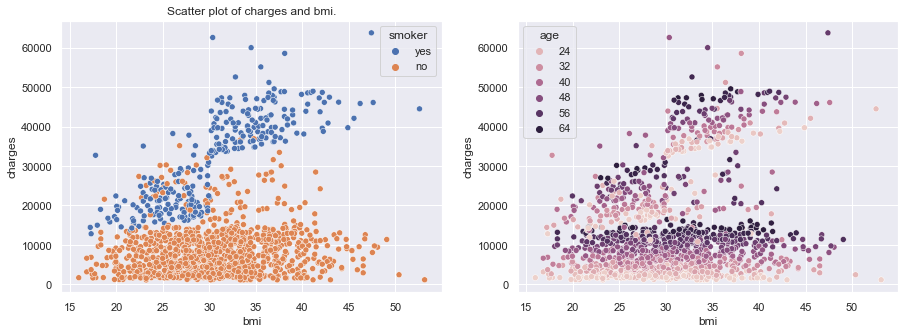

In [31]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(x='bmi', y='charges', data=data, hue='smoker', ax=ax[0])
ax[0].set_title('Scatter plot of charges and bmi.')
sns.scatterplot(x='bmi', y='charges', data=data, hue='age', ax=ax[1])

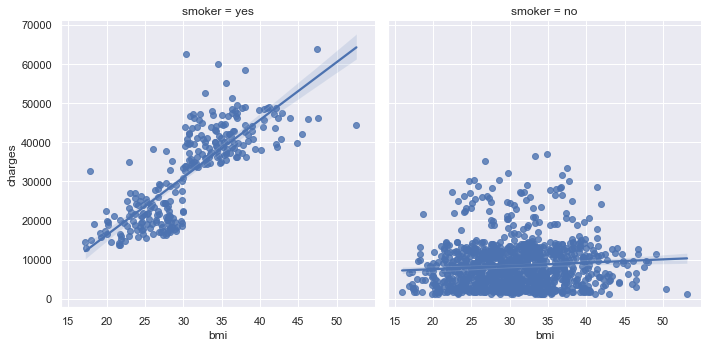

In [32]:
sns.lmplot(x='bmi', y='charges', data=data, col='smoker')

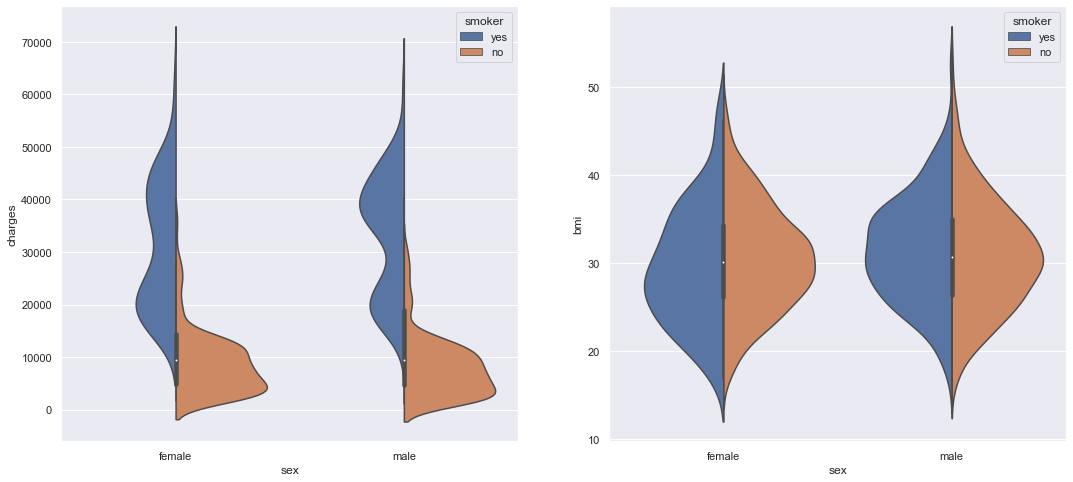

In [33]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x='sex',y= 'charges', hue='smoker', data=data, split=True, ax=ax[0])
sns.violinplot(x='sex', y='bmi', hue='smoker', data=data, split=True, ax=ax[1])
plt.show()

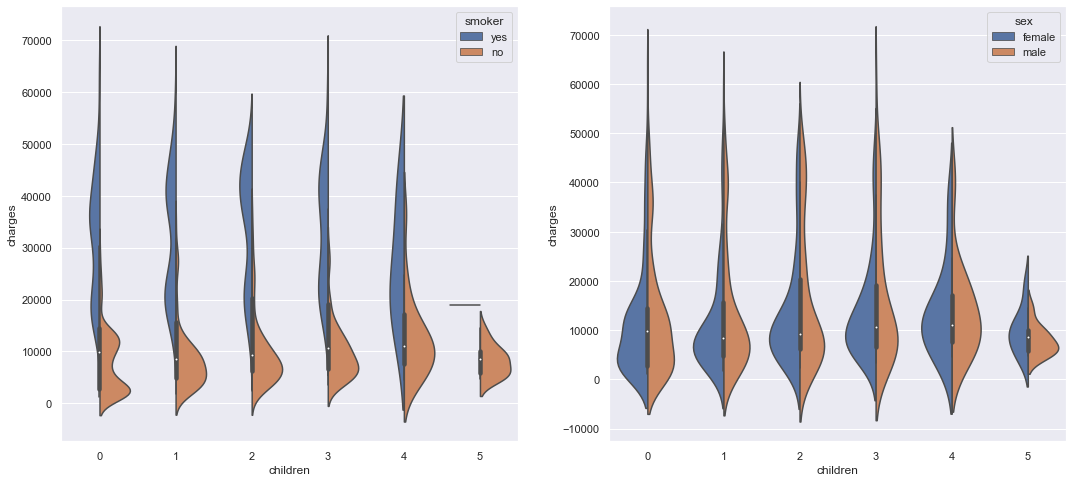

In [34]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x='children',y= 'charges', hue='smoker', data=data, split=True, ax=ax[0])
sns.violinplot(x='children', y='charges', hue='sex', data=data, split=True, ax=ax[1])
plt.show()

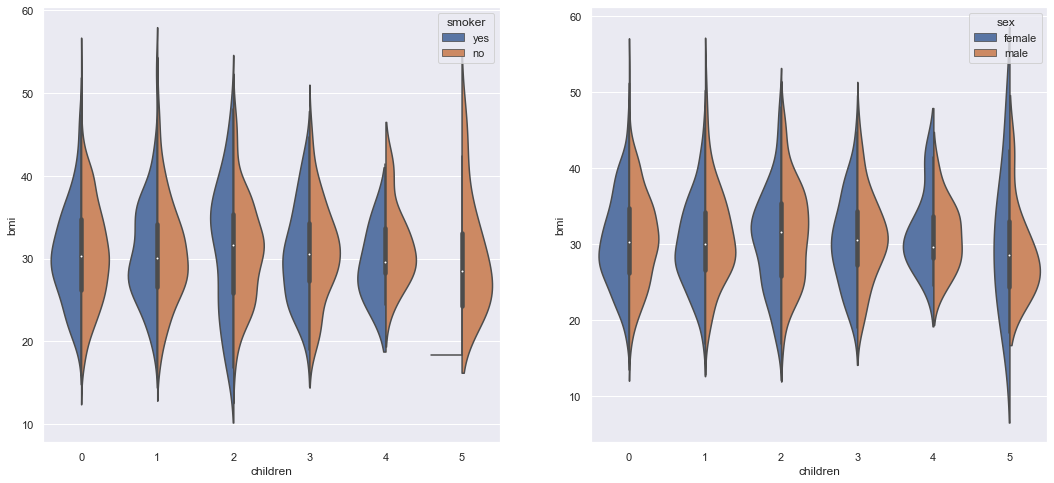

In [35]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x='children',y= 'bmi', hue='smoker', data=data, split=True, ax=ax[0])
sns.violinplot(x='children', y='bmi', hue='sex', data=data, split=True, ax=ax[1])
plt.show()

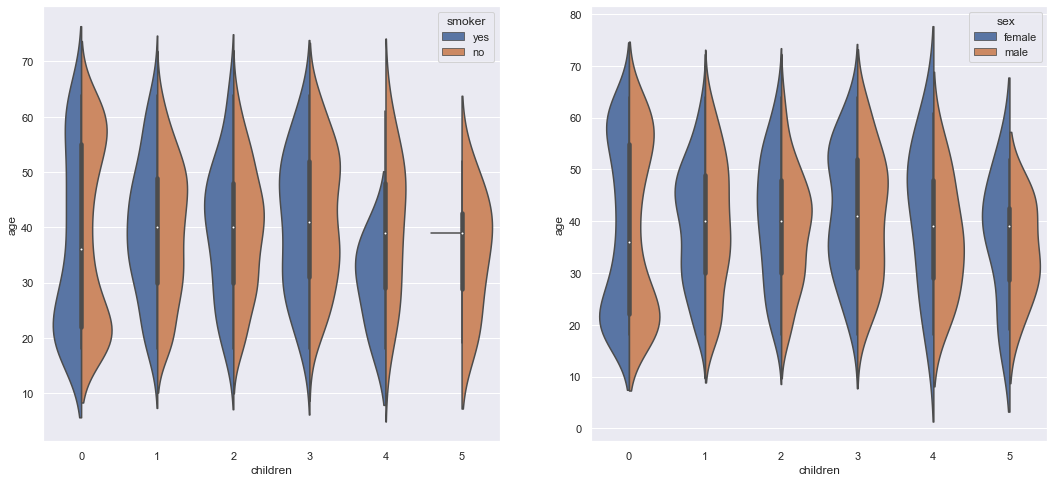

In [36]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x='children',y= 'age', hue='smoker', data=data, split=True, ax=ax[0])
sns.violinplot(x='children', y='age', hue='sex', data=data, split=True, ax=ax[1])
plt.show()

<AxesSubplot:title={'center':'Distribution of BMI'}, xlabel='bmi', ylabel='Count'>

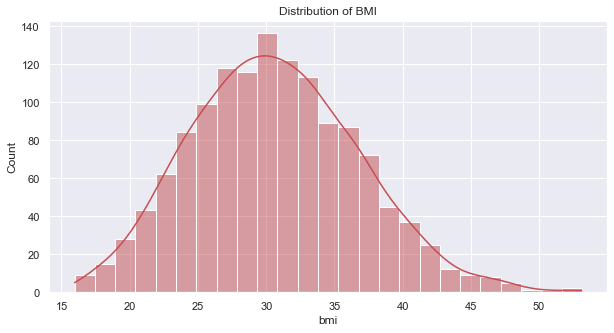

In [37]:
plt.figure(figsize=(10,5))
plt.title('Distribution of BMI')
sns.histplot(data=data, x='bmi', kde=True, color='r')

<AxesSubplot:title={'center':'Distribution of charges for patients with bmi under 18.5 (underweight)'}, xlabel='charges', ylabel='Count'>

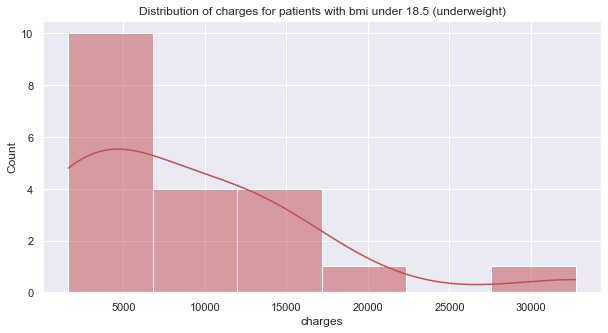

In [38]:
plt.figure(figsize=(10,5))
plt.title('Distribution of charges for patients with bmi under 18.5 (underweight)')
sns.histplot(data=data[data.bmi< 18.5], x='charges', kde=True, color='r')

<AxesSubplot:title={'center':'Distribution of charges for patients with bmi above 18.5 and under 24.9 (normal weight)'}, xlabel='charges', ylabel='Count'>

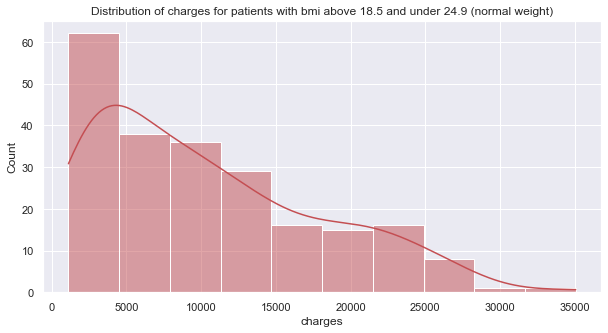

In [39]:
plt.figure(figsize=(10,5))
plt.title('Distribution of charges for patients with bmi above 18.5 and under 24.9 (normal weight)')
sns.histplot(data=data[(data.bmi>=18.5) & (data.bmi< 24.9)], x='charges', kde=True, color='r')

<AxesSubplot:title={'center':'Distribution of charges for patients with bmi above 24.9 and under 24.9 (slightly obese)'}, xlabel='charges', ylabel='Count'>

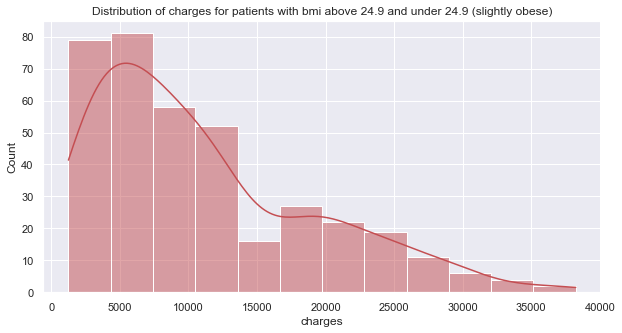

In [40]:
plt.figure(figsize=(10,5))
plt.title('Distribution of charges for patients with bmi above 24.9 and under 24.9 (slightly obese)')
sns.histplot(data=data[(data.bmi>=24.9) & (data.bmi< 29.9)], x='charges', kde=True, color='r')

<AxesSubplot:title={'center':'Distribution of charges for patients with bmi above 29.9 24.9 and under 24.9 ( obese)'}, xlabel='charges', ylabel='Count'>

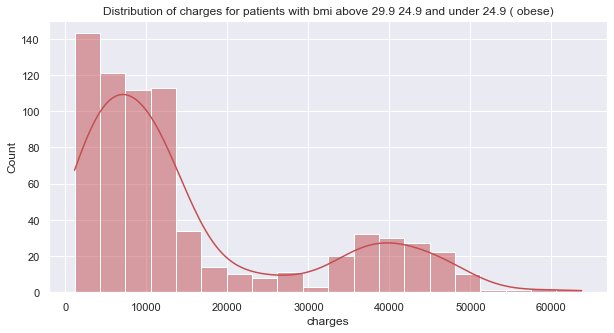

In [41]:
plt.figure(figsize=(10,5))
plt.title('Distribution of charges for patients with bmi above 29.9 24.9 and under 24.9 ( obese)')
sns.histplot(data=data[(data.bmi>29.9)], x='charges', kde=True, color='r')

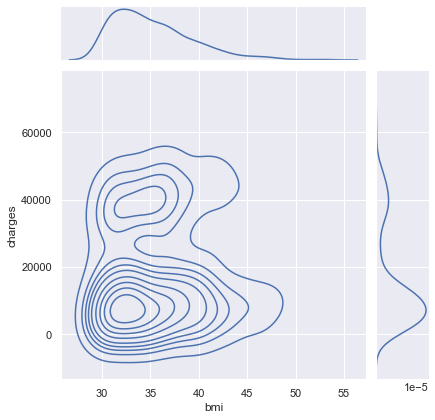

In [42]:
sns.jointplot(data=data[(data.bmi>29.9)], x='bmi', y='charges', kind='kde', color='b')

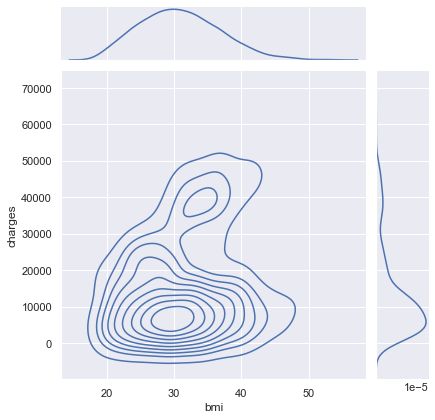

In [43]:
sns.jointplot(data=data[(data.bmi>18.5)], x='bmi', y='charges', kind='kde', color='b')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

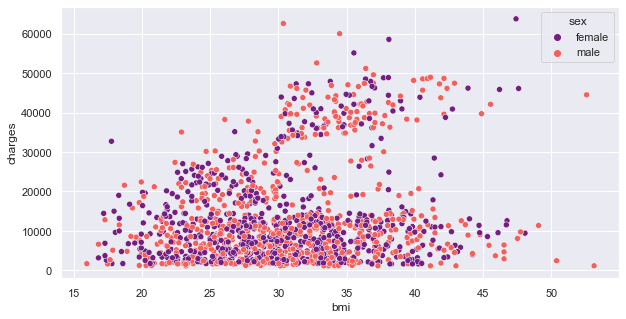

In [44]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='bmi', y='charges',hue='sex', data=data, palette='magma')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

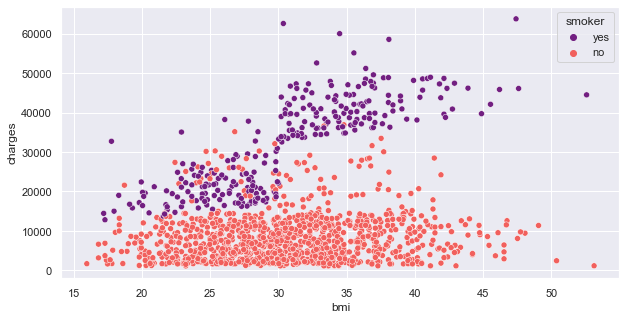

In [45]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='bmi', y='charges',hue='smoker', data=data, palette='magma')

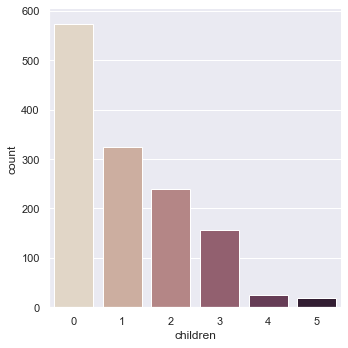

In [46]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, height = 5)

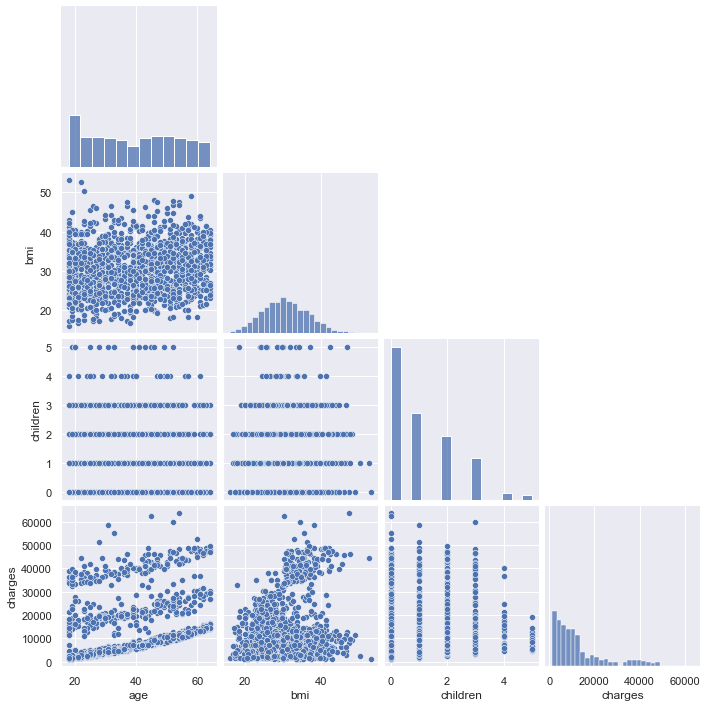

In [47]:
sns.pairplot(data=data, corner=True)
plt.show()

In [48]:
data['age_band'] = 0
data.loc[(data['age']<=16), 'age_band']= 0
data.loc[(data['age']>16) & (data['age']<=32), 'age_band'] =1
data.loc[(data['age']>32) & (data['age']<=48), 'age_band'] =2
data.loc[(data['age']>48) & (data['age']<=64), 'age_band'] =3
data.loc[(data['age']>64), 'age_band'] =4
data.head(5)

,age,sex,bmi,children,smoker,region,charges,age_band
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,1


In [49]:
data['age_band'].value_counts().to_frame()

,age_band
1,497
2,428
3,413


In [50]:
data['sex_band'] = 0
data.loc[(data['sex'] == 'female'), 'sex_band']= 1
data.loc[(data['sex'] == 'male'), 'sex_band']= 0
data.head(5)

,age,sex,bmi,children,smoker,region,charges,age_band,sex_band
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,2,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [51]:
data['smoker_band'] = 0
data.loc[(data['smoker'] == 'yes'), 'smoker_band']= 1
data.loc[(data['smoker'] == 'no'), 'smoker_band']= 0
data.head(5)

,age,sex,bmi,children,smoker,region,charges,age_band,sex_band,smoker_band
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,2,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0


In [52]:
data['sex_band'].value_counts().to_frame()

,sex_band
0,676
1,662


In [53]:
data['smoker_band'].value_counts().to_frame()

,smoker_band
0,1064
1,274


In [54]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [55]:
data['region_band'] = 0
data.loc[(data['region'] == 'southeast'), 'region_band']= 1
data.loc[(data['region'] == 'northwest'), 'region_band']= 2
data.loc[(data['region'] == 'southwest'), 'region_band']= 3
data.loc[(data['region'] == 'northeast'), 'region_band']= 4

data.head(5)

,age,sex,bmi,children,smoker,region,charges,age_band,sex_band,smoker_band,region_band
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,2,0,0,2
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,2


In [56]:
data['bmi'].value_counts()

32.300    13
28.310     9
30.800     8
34.100     8
28.880     8
          ..
44.745     1
26.070     1
27.300     1
37.715     1
29.200     1
Name: bmi, Length: 548, dtype: int64

In [57]:
data['bmi_band'] = 0
data.loc[(data['bmi']<=18.5), 'bmi_band']= 0
data.loc[(data['bmi']>18.5) & (data['bmi']<=24.9), 'bmi_band'] =1
data.loc[(data['bmi']>24.9) & (data['bmi']<=29.9), 'bmi_band'] =2
data.loc[(data['bmi']>29.9), 'bmi_band'] =3
data.head(5)

,age,sex,bmi,children,smoker,region,charges,age_band,sex_band,smoker_band,region_band,bmi_band
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,1,3,2
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,3
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,3
3,33,male,22.705,0,no,northwest,21984.47061,2,0,0,2,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,2,2


In [58]:
data.drop(['age', 'sex', 'bmi', 'smoker', 'region'], axis=1, inplace=True)

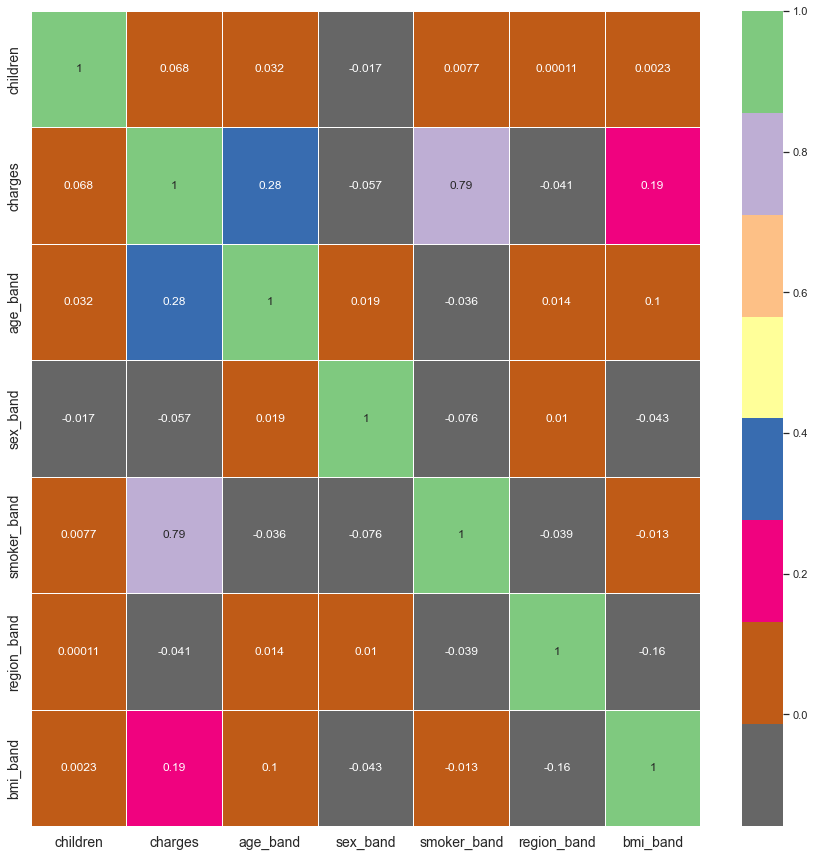

In [87]:

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap='Accent_r', linewidths=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [62]:
x = data[['age_band', 'sex_band', 'smoker_band', 'bmi_band']]
y = data['charges']

x

,age_band,sex_band,smoker_band,bmi_band
0,1,1,1,2
1,1,0,0,3
2,1,0,0,3
3,2,0,0,1
4,1,0,0,2
...,...,...,...,...
1333,3,0,0,3
1334,1,1,0,3
1335,1,1,0,3
1336,1,1,0,2


In [83]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

## Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [81]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [66]:
prediction = model.predict(x_test)

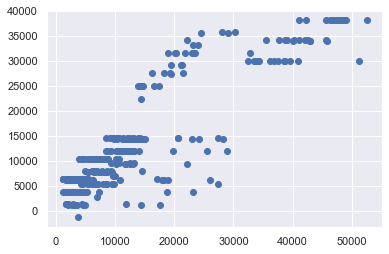

In [67]:
plt.scatter(y_test, prediction)
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

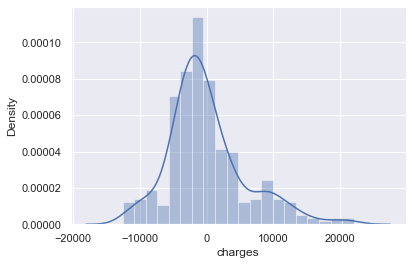

In [68]:
sns.distplot(y_test-prediction, bins=20)

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 4309.6034181997375
MSE: 34267099.556015
RMSE: 5853.81068672493


In [70]:
print(model.score(x_test, y_test))

0.7823406129405632


In [71]:
x2 = data.drop(['charges', 'region_band'], axis=1)
y2 = data.charges
poly_f = PolynomialFeatures(degree=2)
x_quad = poly_f.fit_transform(x2)
train_x, test_x, train_y, test_y = train_test_split(x2, y2, random_state=0)

model3 =LinearRegression().fit(train_x, train_y)
pred_y_train_1 = model3.predict(train_x)
pred_y_test_1 = model3.predict(test_x)

print(model3.score(test_x, test_y))

0.7850704714249434


In [72]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(train_x,train_y)
forest_train_pred_3 = forest.predict(train_x)
forest_test_pred_3 = forest.predict(test_x)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(train_y,forest_train_pred_3),
mean_squared_error(test_y,forest_test_pred_3)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(train_y,forest_train_pred_3),
r2_score(test_y,forest_test_pred_3)))

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


MSE train data: 19946076.395, MSE test data: 22217732.670
R2 train data: 0.860, R2 test data: 0.859


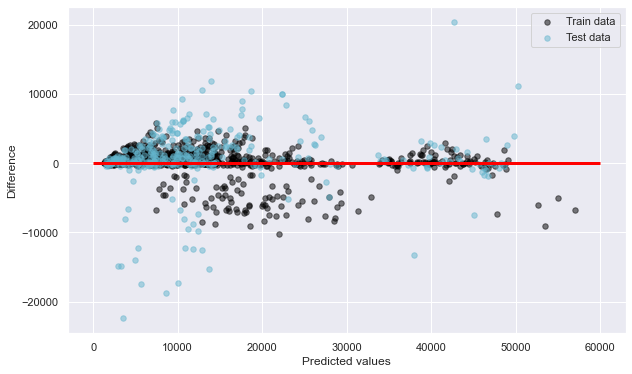

In [84]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred_3, forest_train_pred_3-train_y, c='black', marker='o', s=30, alpha=0.5, label='Train data')
plt.scatter(forest_test_pred_3, forest_test_pred_3-test_y, c='c', marker='o', s=30, alpha=0.5, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Difference')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=0, xmax=60000, lw=3, color='red')
plt.show()